In [193]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
dataset = pd.read_csv('diabetes_data_upload.csv')

In [195]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [196]:
for category in dataset.columns[2:16]:
  dataset[category] = dataset[category].apply(lambda x: 1 if(x == 'Yes') else 0)

dataset['Gender'] = dataset['Gender'].apply(lambda x: 1 if(x == 'Male') else 0)
dataset['class'] = dataset['class'].apply(lambda x: 1 if(x == 'Positive') else 0)

dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [197]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [198]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
Gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
Polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
Polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden weight loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
Polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
Genital thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
Itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


#Step 2: Data Visualization

<AxesSubplot:xlabel='class', ylabel='count'>

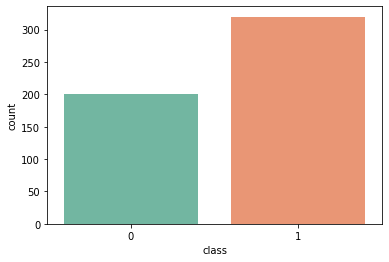

In [199]:
sns.countplot(x = 'class',data = dataset, palette='Set2')

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


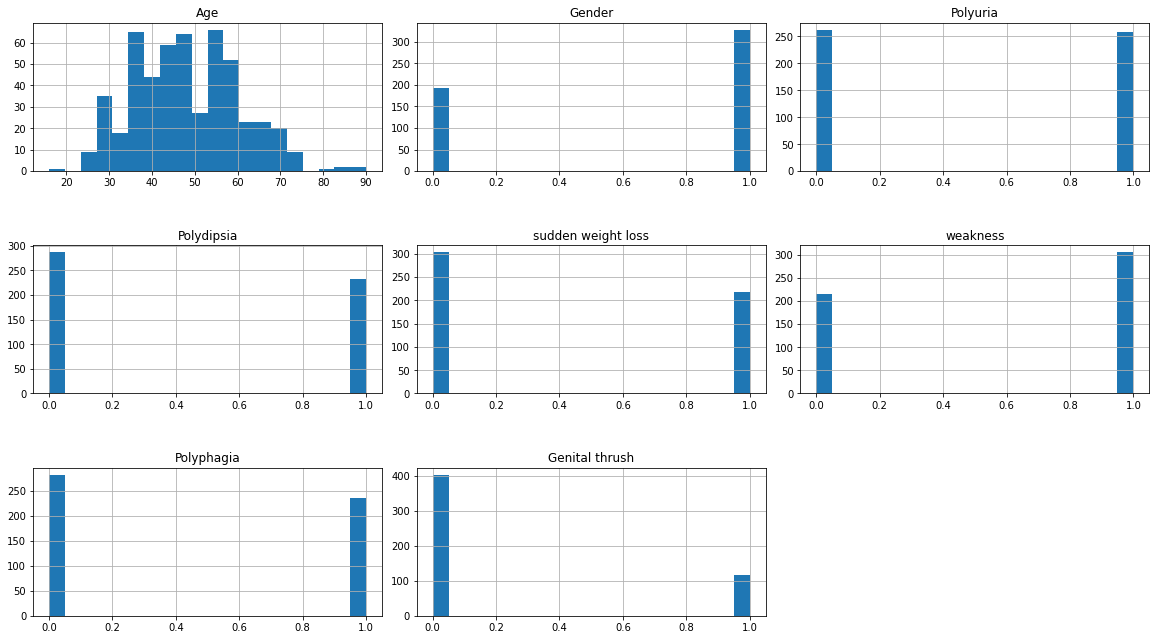

In [200]:
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

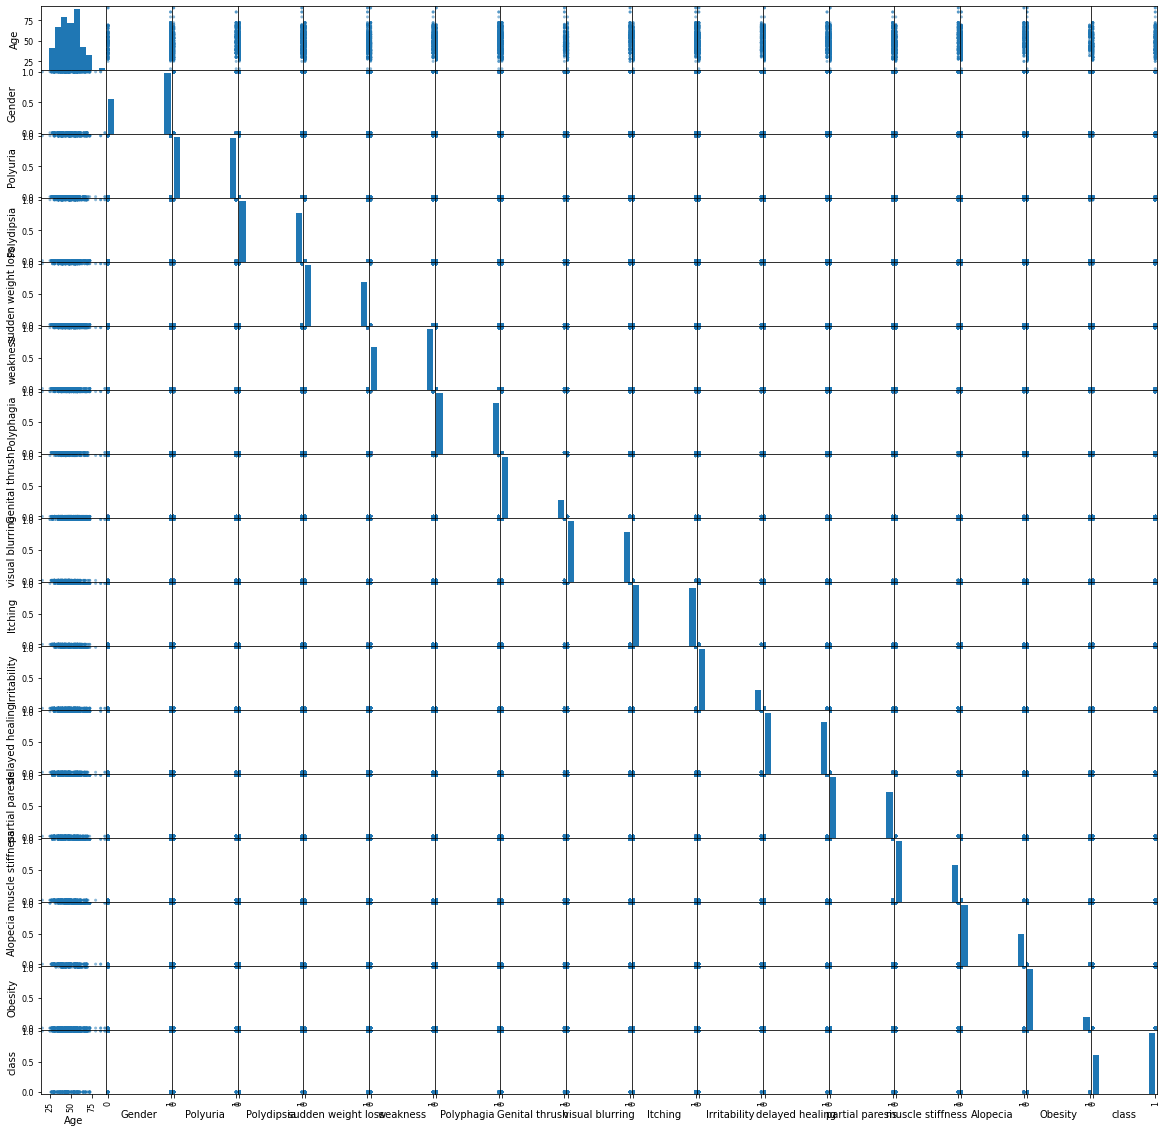

In [201]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

In [202]:
dataset.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


# Step 3: Data Preprocessing



In [203]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset['class'] )

In [205]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
63,60,0,1,0,1,1,0,1,1,1,0,1,1,1,0,1
101,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0
157,48,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0
436,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
274,57,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,30,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
170,49,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0
145,61,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0
383,61,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


# Step 4: Data Modelling

In [206]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)


SVC(kernel='linear', random_state=42)

In [207]:
Y_pred_svc = svc.predict(X_test)

In [208]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [209]:
Y_pred_logreg = logreg.predict(X_test)

# Step 5: Model Evaluation

In [210]:
from sklearn.metrics import accuracy_score

accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)

In [211]:
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Logistic Regression: " + str(accuracy_logreg * 100))

Support Vector Classifier: 93.26923076923077
Logistic Regression: 94.23076923076923


# Step 6: Dimenstional Reduction

# PCA


In [212]:
from sklearn.decomposition import PCA

pca = PCA(0.995)
pca.fit(X_train)

PCA(n_components=0.995)

In [213]:
X_train_tranformed = pca.transform(X_train)
X_test_tranformed = pca.transform(X_test)

In [214]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train_tranformed, Y_train)

Y_pred_svc = svc.predict(X_test_tranformed)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 90.38461538461539


# LDA

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [216]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train_scaled, Y_train)

X_train_transformed = lda.transform(X_train_scaled)
X_test_transformed = lda.transform(X_test_scaled)

In [217]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train_tranformed, Y_train)

Y_pred_svc = svc.predict(X_test_tranformed)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 90.38461538461539
